
# Read results from Atmfit

Now we will use `read_results` to work with the feather file

In [1]:
import pandas as pd
import numpy as np
from minato import read_results as rr

First we load the feather table

In [2]:
data = 'atmfit_results.feather'
df = pd.read_feather(data)
display(df)

,lrat,teffA,loggA,rotA,He2H,teffB,loggB,rotB,chi2_tot,chi2A,chi2B,chi2r_tot,chi2redA,chi2redB,ndata
0,0.30,10,20,20,0.08,22.0,25,200,7.135265,6.024352,1.110912,0.006407,0.005275,0.001131,2140
1,0.30,10,20,20,0.08,22.0,30,200,6.678134,6.024352,0.653781,0.005941,0.005275,0.000666,2140
2,0.30,10,20,20,0.08,22.0,35,200,7.167236,6.024352,1.142883,0.006439,0.005275,0.001164,2140
3,0.30,10,20,20,0.08,22.0,40,200,8.718980,6.024352,2.694627,0.008019,0.005275,0.002744,2140
4,0.30,10,20,20,0.08,24.0,25,200,7.756076,6.024352,1.731723,0.007039,0.005275,0.001763,2140
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56995,0.45,15,28,60,0.12,30.0,30,200,1.949757,1.277240,0.672517,0.001803,0.001118,0.000685,2140
56996,0.45,15,28,60,0.12,30.0,35,200,1.971510,1.277240,0.694269,0.001825,0.001118,0.000707,2140
56997,0.45,15,28,60,0.12,30.0,40,200,2.944082,1.277240,1.666842,0.002816,0.001118,0.001697,2140
56998,0.45,15,28,60,0.12,32.5,35,200,2.069141,1.277240,0.791901,0.001925,0.001118,0.000806,2140


And now we use `compute_bestfit` to get a nice plot of the minimum $\chi^2$ for each parameter, and the respective 1-$\sigma$ uncertainties. For 2-$\sigma$ uncertainties use `cl=0.95`

First, `compute_bestfit` will show us some information about the $\chi^2$ values, including a histogram. The second step is to get the minimum $\chi^2$ value for each value in the grid, which are printed on the cell output, and then it fits these points, in this case with a polinomial. If you have quite symmetric $\chi^2$ values, you can try `fit_type='parab'`. Finally, you get the plot, which you can save by specifying a save path `save_to='path+filename.extension'`

min unscaled chi2 value = 0.7386358653936944
min scaled chi2 value = 2125.0
max scaled chi2 value = 73223.51979310601


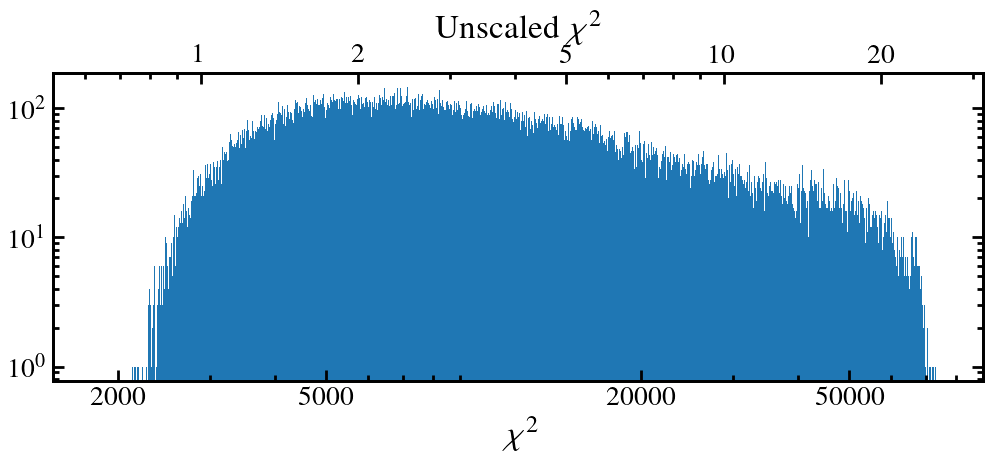

68.0% confidence level = 2154.9640202995706

Getting min values and intercepts (no interpolation)
lrat
[0.3, 0.35, 0.4, 0.45]
[2706.1354468125537, 2312.3158410702663, 2125.0, 2509.1646453676685]
He2H
[0.08, 0.09, 0.1, 0.11, 0.12]
[2296.666288649867, 2288.6121958788176, 2162.902765649821, 2125.0, 2193.6152647831404]
teffA
[10, 11, 12, 13, 14, 15]
[6321.590784816055, 3331.368016405772, 2298.351898566986, 2125.0, 2288.6121958788176, 2296.7919905123563]
loggA
[2.0, 2.2, 2.4, 2.6, 2.8]
[2729.4595425894654, 2298.351898566986, 2125.0, 2296.7919905123563, 2785.639976001127]
teffB
[22.0, 24.0, 26.0, 28.0, 30.0, 32.5]
[2286.139239911285, 2342.501028931066, 2125.0, 2344.0055956984397, 2441.2664369713552, 3214.2949395667997]
loggB
[2.5, 3.0, 3.5, 4.0]
[2286.139239911285, 2125.0, 2441.2664369713552, 3267.1013815390725]
rotA
[20, 30, 40, 50, 60]
[2268.034000073258, 2151.171602442513, 2125.0, 2230.450581072161, 2438.0206449872494]
rotB
Too few values to interpolate.
[200]
nan

Fitting polynomial to p

/Users/jaime/Science/github/jvillasr/MINATO/minato/read_results.py:179: UserWarning: Attempting to set identical left == right == 200.0 results in singular transformations; automatically expanding.
  ax[i].set_xlim(minval[0][0] - 0.2*xrange, minval[0][-1] + 0.2*xrange)


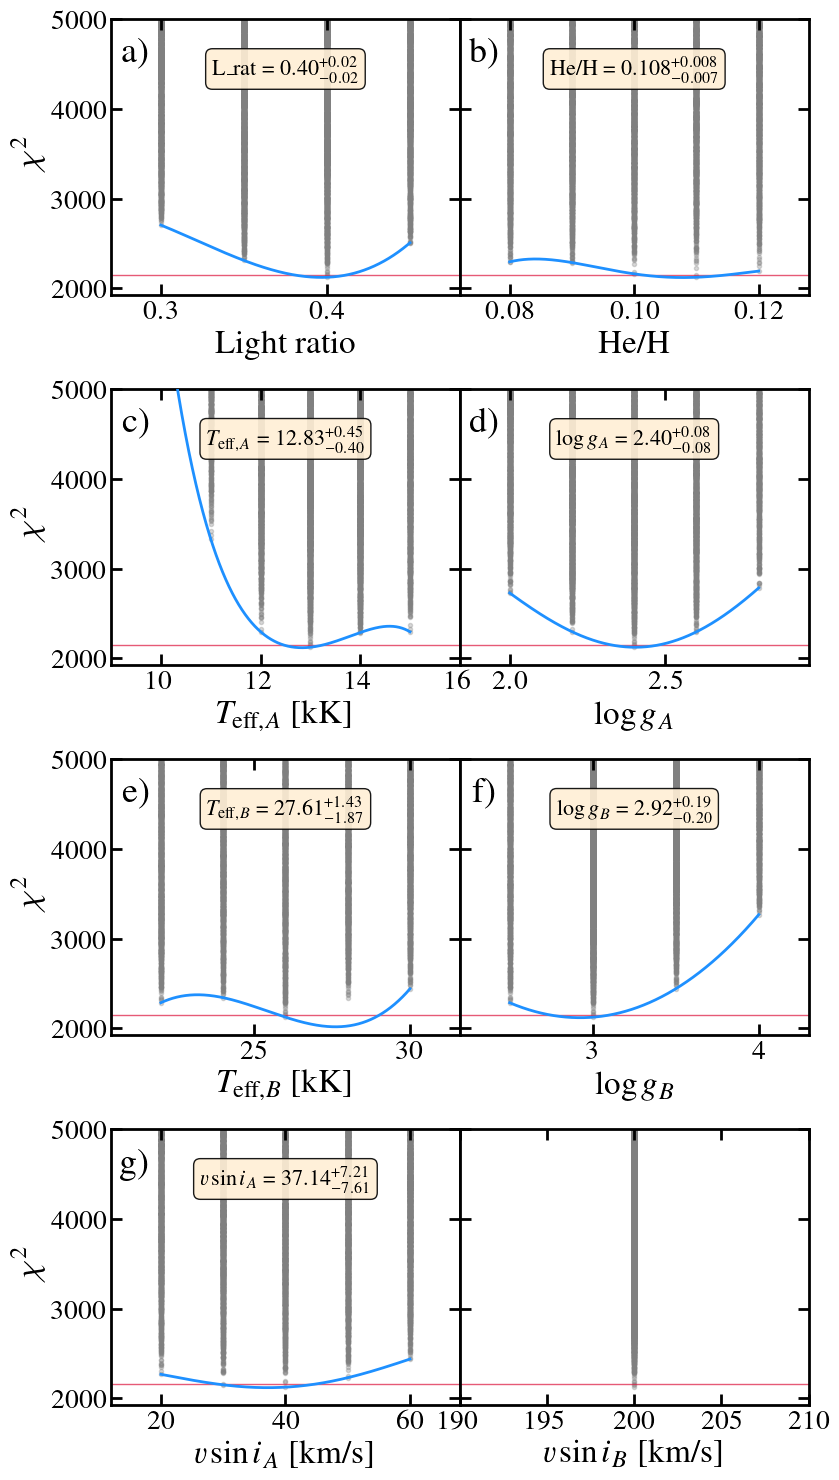

In [3]:
rr.compute_bestfit(df, fit_type='poly', chi2max=5000, save_to='./errors_plot.png')

# 2D $\chi^2$ map

It can be useful to plot the 2D $\chi^2$ map to look for correlations and degeneracies.<br>
For this we need to bring back the grid we constructed for the `span_example` tutorial, and we'll put it in a dictionary

In [7]:
teffA = np.linspace(10, 15, 6, dtype=int)
loggA = [20, 22, 24, 26, 28]
rotA = list(range(20, 70, 10))
teffB = [22, 24, 26, 28, 30, 32.5]
loggB = [25, 30, 35, 40]
# rotB = list(range(0, 600, 100))
rotB = [200]
lrat = np.linspace(30, 45, 4)/100
he2h = np.linspace(8, 12, 5)/100
pars_dic = {'lrat':lrat, 'He2H':he2h, 'rotB':rotB, 'loggB':loggB, 'teffB':teffB, 'rotA':rotA, 'loggA':loggA, 'teffA':teffA}

It's important to rename the $\chi^2$ column to 'chi2' so that the code can pick the correct column

In [8]:
df.rename(columns={'chi2_tot': 'chi2'}, inplace=True)

We'll do the plot using `plot_corr`. One of the parameters we'll use here is `rot_labels` to rotate the tick labels that are too long.<br> We need the number of the bottom panels where we want to apply the rotation, this number increases to the right and from top to bottom, so in our case we want panels 45 and 47.

The parameter `vmax` is also useful since it will allows to adapt the maximum value in the color map.<br>
The histogram at the beginning of this tutorial can be helpful for this.

Setting `clabels='sigma'` will plot $\sigma$ labels to the contours. `clabels='numeric'` can also be used to show numeric values.

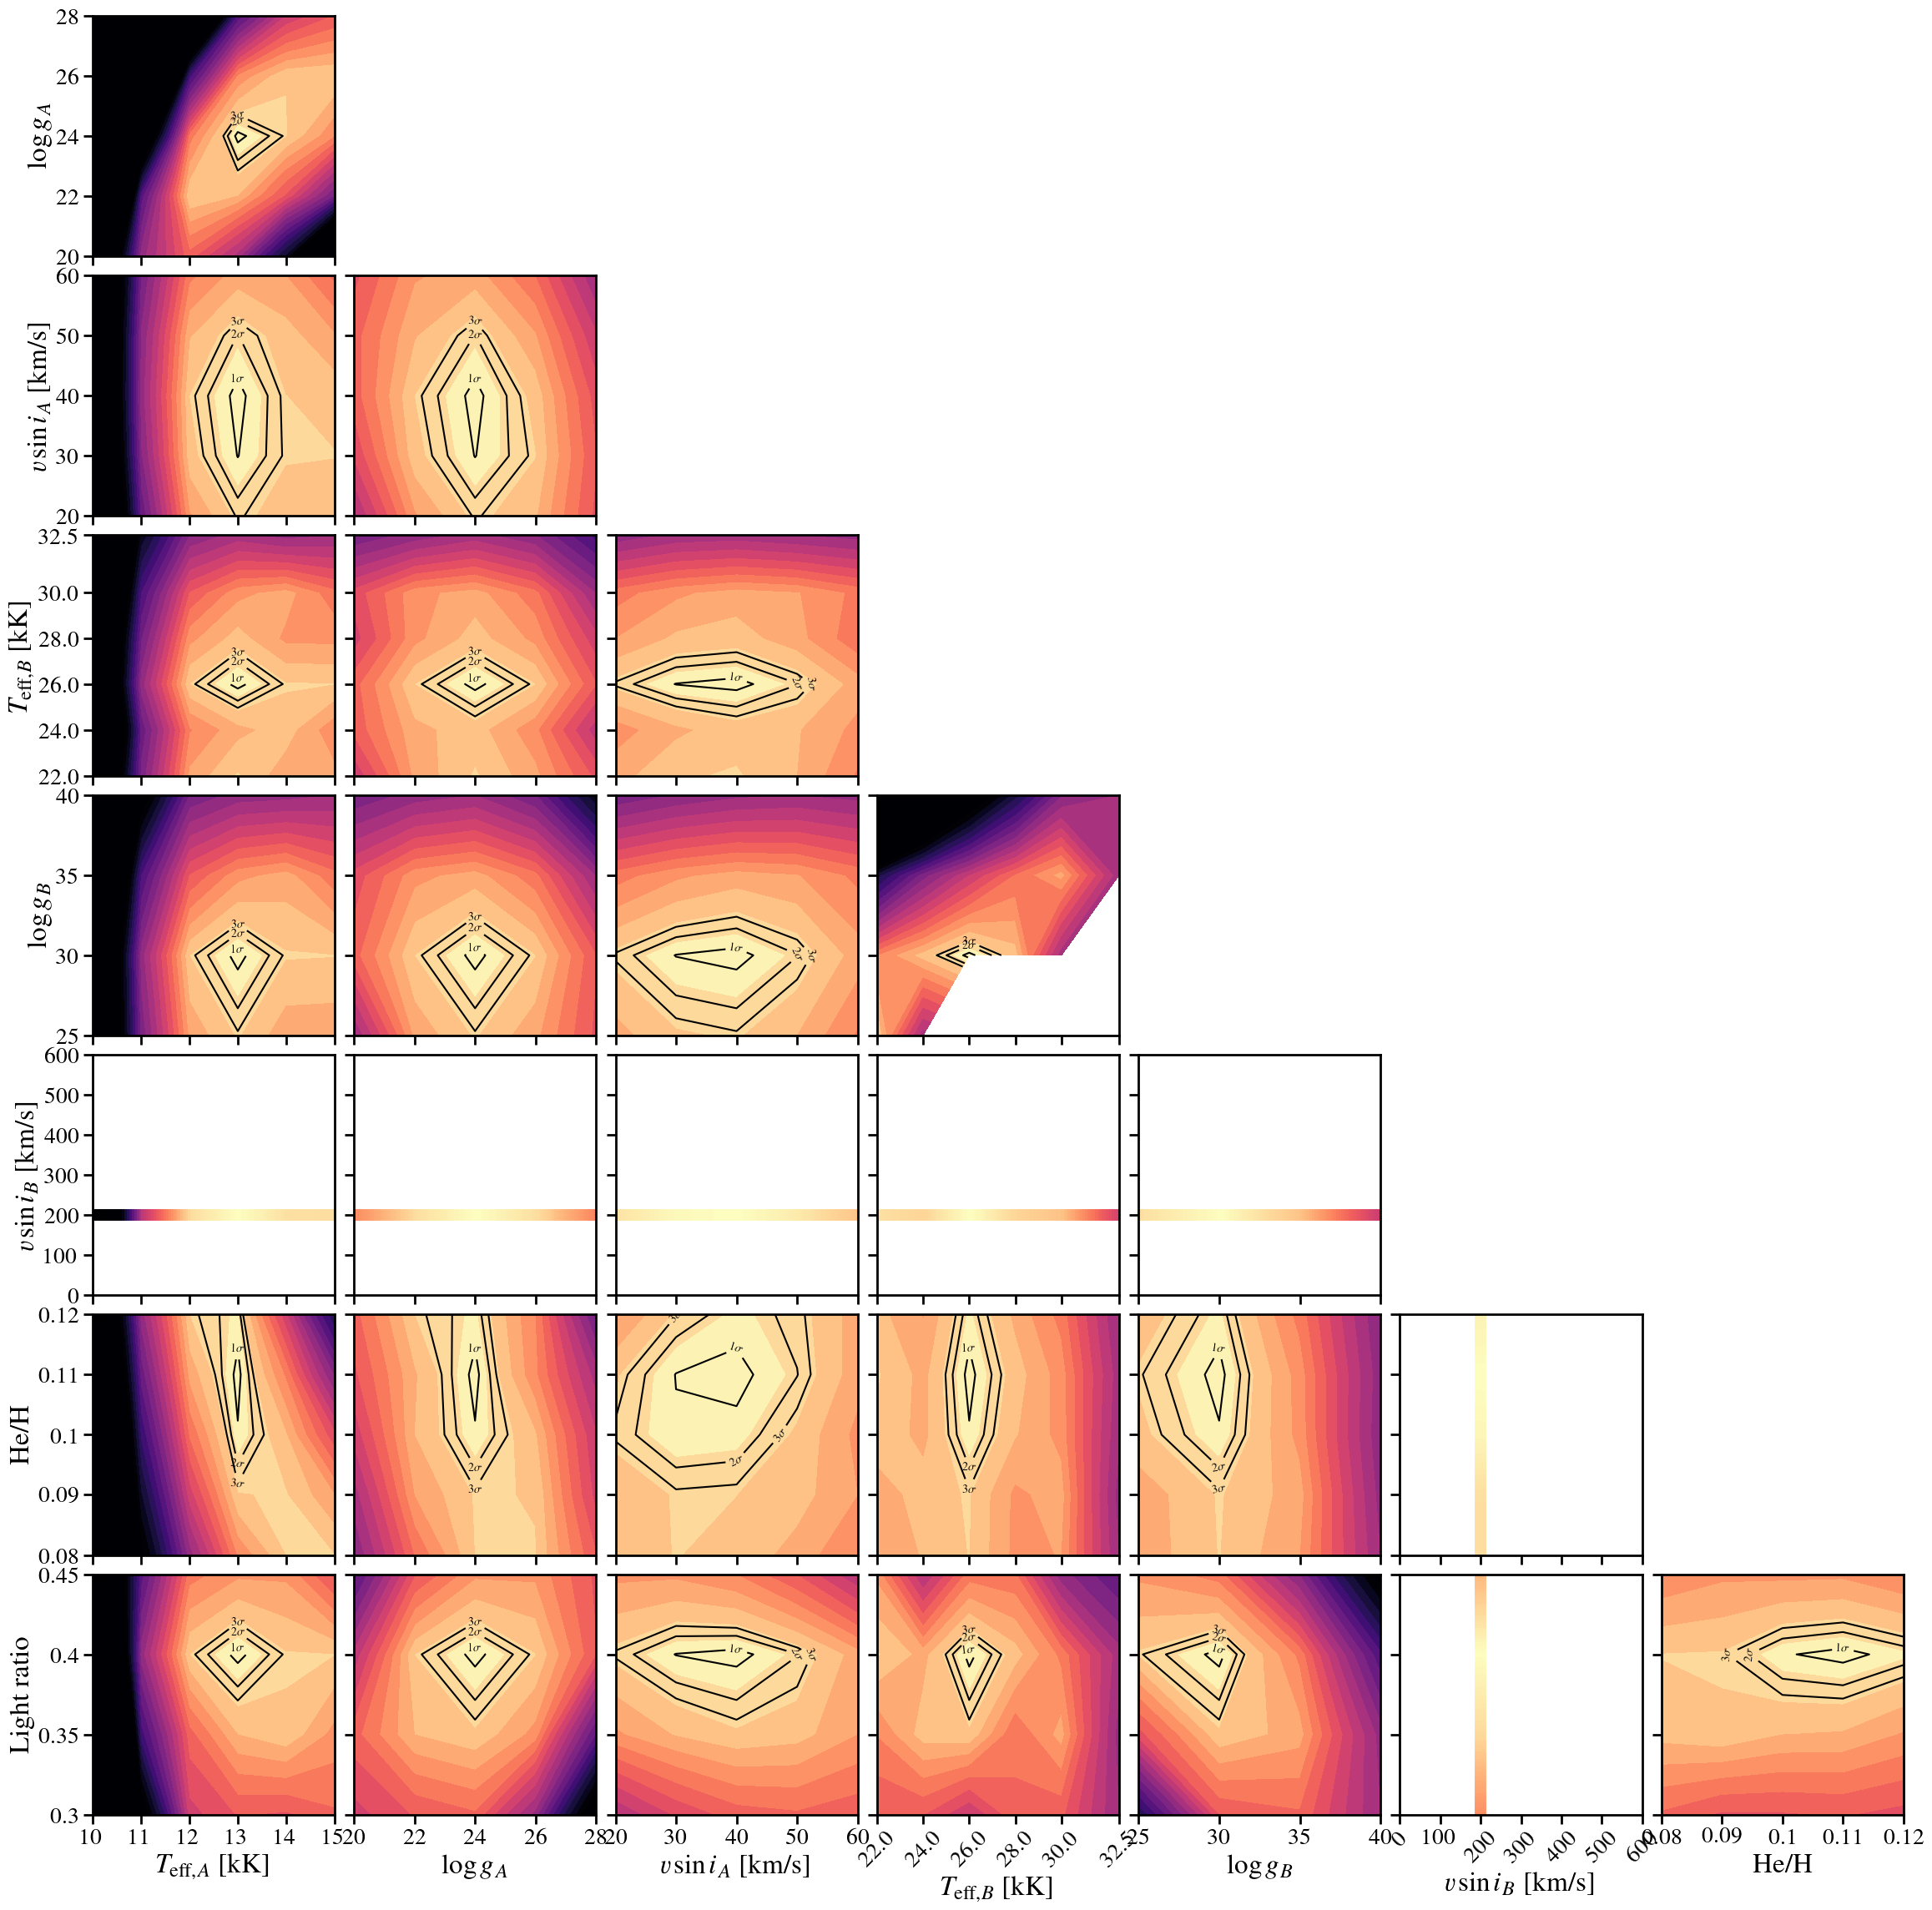

In [6]:
rotate = [45, 47]
rr.plot_corr(df, pars_dic, vmax=1.6, rot_labels=rotate, clabels='sigma')

To see how to plot the best-fitting models found in this tutorial, see the **plot_model** tutorial